In [1]:
"""檢視空值及零值"""

import pandas as pd


def analyze_nan_and_zero_values(
    data, threshold, sort_column="零值+NAN佔比 (%)", ascending=False
):
    """
    檢查0值和 nan 的數量
    threshold 為 百分比，例threshold=20，會回傳 零值+NAN佔比 (%) 大於20% 的
    當 threshold = 0 會回傳全部
    """

    # 如果輸入是文件路徑，讀取CSV文件並轉換成Pandas DataFrame

    if isinstance(data, str):

        file_source_pd = pd.read_csv(data)

    # 如果輸入是Pandas DataFrame，直接使用它

    elif isinstance(data, pd.DataFrame):

        file_source_pd = data

    else:

        raise ValueError(
            "Invalid input type. Input must be either file path or Pandas DataFrame."
        )

    # 計算這個範圍內每一欄的空白值(NaN)數量

    nan_values_per_column_in_range = file_source_pd.isnull().sum(axis=0)

    # 計算每個欄位的總數據量

    total_data_per_column = len(file_source_pd)

    # 計算每個欄位的空白值(NaN)佔比

    nan_percentage_per_column = (
        nan_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算這個範圍內每一欄的零值數量

    zero_values_per_column_in_range = (file_source_pd == 0).sum(axis=0)

    # 計算每個欄位的零值佔比

    zero_percentage_per_column = (
        zero_values_per_column_in_range / total_data_per_column
    ) * 100

    # 計算每個欄位的零值和NaN值的總數

    total_zero_and_nan_per_column = (
        zero_values_per_column_in_range + nan_values_per_column_in_range
    )

    # 計算每個欄位的零值和NaN值總數的佔比

    total_zero_and_nan_percentage_per_column = (
        total_zero_and_nan_per_column / total_data_per_column
    ) * 100

    # 將結果轉換為 DataFrame

    values_df = pd.DataFrame(
        {
            "欄位名稱": nan_values_per_column_in_range.index,
            "零值+NAN佔比 (%)": total_zero_and_nan_percentage_per_column.values.round(
                2
            ),
            "空白值(NaN)數量": nan_values_per_column_in_range.values,
            "空白值(NaN)佔比 (%)": nan_percentage_per_column.values.round(2),
            "零值數量": zero_values_per_column_in_range.values,
            "零值佔比 (%)": zero_percentage_per_column.values.round(2),
        }
    )

    # 將 DataFrame 存儲到 CSV 檔案中
    values_df.to_csv("零值與空白值統計.csv", index=False, encoding="utf-8-sig")

    # 如果 threshold 等於 0，則返回所有欄位
    if threshold == 0:
        return values_df

    # 篩選出 '零值+NAN佔比 (%)' 大於指定閾值的欄位

    filtered_values_df = values_df[values_df["零值+NAN佔比 (%)"] > threshold]

    # 根據指定的列進行排序

    sorted_values_df = filtered_values_df.sort_values(
        by=sort_column, ascending=ascending
    )

    return sorted_values_df


# 測試


# result_df = analyze_nan_and_zero_values(clean_data, threshold=0, sort_column='欄位名稱', ascending=False)


# print(result_df)

In [2]:
import pandas as pd

# file_path = r"..\飲料店總表0307final01_補上人氣_補值_xlsxclustered_HG_data.xlsx"
file_path = r"..\飲料店總表0307final01_補上人氣_補值_hg.xlsx"
# dataset = pd.read_csv(file_path, sep=",", encoding="UTF-8")

dataset = pd.read_excel(file_path)
# print(dataset.info())

In [3]:
"""selected_data
"""

selected_data = dataset[
    [
        "star",
        "school_counts",
        "drink_counts",
        "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        "people_flow_mean",
        "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
        # "KMEANS",
    ]
]

# selected_data

In [ ]:
selected_data_heat_map = dataset[
    [
        # "star",
        "school_counts",
        "drink_counts",
        # "train_counts",
        "youbike_counts",
        "bus_counts",
        "park_counts",
        # "night_market_counts",
        "sports_facilities_counts",
        "mrt_counts",
        "movie_theater_counts",
        "hospital_counts",
        "salary_income_median",
        # "people_flow_mean",
        # "knock_down_price_mean",
        "weekend_open",
        "road_area_ratio",
        "age",
        # "weekday_working_hours_average",
        # "comment",
        # "people_flow_average",
        "popularity",
    ]
]

In [ ]:
"""篩選關係姓小的"""

# 計算與 'KMEANS' 欄位相關性的系列
corr_with_kmeans = selected_data.corr()["popularity"]

# 篩選出與 'KMEANS' 相關性小於0.1的欄位
low_corr_with_kmeans = corr_with_kmeans[abs(corr_with_kmeans) < 0.1]

# 列出這些欄位的名稱
print("與 'popularity' 欄位相關性小於0.1的欄位：")
print(low_corr_with_kmeans.index.tolist())
selected_data = selected_data.drop(low_corr_with_kmeans.index.tolist(), axis=1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 假設的 selected_data 和 'popularity' 欄位數據
np.random.seed(0)

# 使用 pd.qcut 進行分類
Y_classification_pd = pd.DataFrame({"value": selected_data["popularity"]})
Y_classification_pd["category"] = pd.qcut(
    Y_classification_pd["value"],
    q=5,
    labels=["Category 0", "Category 1", "Category 2", "Category 3", "Category 4"],
)

# 分組並獲得統計信息
summary_df = (
    Y_classification_pd.groupby("category")["value"]
    .agg([("最小值", "min"), ("最大值", "max"), ("數量", "size")])
    .reset_index()
)

# 建立分類
value_category_ranges = [
    summary_df.loc[0, "最小值"],  # 第一類別的最小值
    summary_df.loc[1, "最小值"],  # 第二類別的最小值
    summary_df.loc[2, "最小值"],  # 第三類別的最小值
    summary_df.loc[3, "最小值"],  # 第四類別的最小值
    summary_df.loc[4, "最小值"],  # 第五類別的最小值
    summary_df.loc[4, "最大值"],  # 第五類別的最大值
]

# 使用 pd.cut 根據新的範圍劃分 'popularity' 欄位
selected_data["popularity_category"] = pd.cut(
    selected_data["popularity"],
    bins=value_category_ranges,
    right=False,  # 包括左邊界，排除右邊界
    labels=[0, 1, 2, 3, 4],
)

# 將超出範圍的值填充為最大範圍的類別（4）
selected_data["popularity_category"].fillna(4, inplace=True)

# 將 'popularity_category' 列轉換為整數類型
selected_data["popularity_category"] = selected_data["popularity_category"].astype(int)

# 打印新的分類結果和每類的數量
print(selected_data["popularity_category"].value_counts().sort_index())
print(summary_df)

In [5]:
"""因為數值分布差很多 刪掉極端"""

import numpy as np

# 直接在原始 DataFrame 中刪除 'popularity' 小於 8726.779 的行
selected_data = selected_data[selected_data["popularity"] <= 2213.641425]
selected_data = selected_data[selected_data["popularity"] != 0]

# '''資料分布不均 取log'''
selected_data["popularity"] = np.log10(selected_data["popularity"])

selected_data["popularity"].min()

# 顯示過濾後的數據
# print(selected_data)


# 使用 pd.cut 根據數值大小劃分 'popularity' 欄位

# 計算數據範圍

min_val = selected_data["popularity"].min()

max_val = selected_data["popularity"].max()


# 創建五個分組的邊界值

bins = np.linspace(min_val, max_val, 6)


# 使用 pd.cut 來分組

selected_data["popularity_category"] = pd.cut(
    selected_data["popularity"],

    bins=bins,

    include_lowest=True,  # 確保包括最低值

    labels=[0, 1, 2, 3, 4],  # 這是每個範圍的標籤
)


# 打印新的分類結果和每類的數量

# print(selected_data['popularity_category'].value_counts().sort_index())


# 建立統計信息表格

summary_df = (

    selected_data.groupby("popularity_category")["popularity"]

    .agg(最小值="min", 最大值="max", 數量="size")

    .reset_index()
)

print(summary_df)

  popularity_category       最小值       最大值    數量
0                   0 -3.007767 -1.737892    85
1                   1 -1.735366 -0.467482   265
2                   2 -0.453712  0.799761   555
3                   3  0.806709  2.072348   954
4                   4  2.073407  3.343662  2352


C:\Users\student\AppData\Local\Temp\ipykernel_8148\3427499123.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  selected_data.groupby("popularity_category")["popularity"]


In [6]:
"""轉位數"""

selected_data["age"] = selected_data["age"].round(2)
selected_data["road_area_ratio"] = selected_data["road_area_ratio"].round(3)


# dataset['brand'] = dataset['brand'].fillna(-1)
# dataset['Saturday_open_hours'] = dataset['Saturday_open_hours'].fillna(-1)
# dataset['Sunday_open_hours'] = dataset['Sunday_open_hours'].fillna(-1)


# X = dataset.drop(
#     ['comment','star','people_flow_average','popularity',"KMEANS"], axis=1
# )
y = selected_data["popularity_category"]
X = selected_data.drop(["popularity", "popularity_category"], axis=1)

# y = dataset["KMEANS"]
y = y.to_frame()
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [8]:
analyze_nan_and_zero_values(X, 0, sort_column="零值+NAN佔比 (%)", ascending=False)
analyze_nan_and_zero_values(y, 0, sort_column="零值+NAN佔比 (%)", ascending=False)

,欄位名稱,零值+NAN佔比 (%),空白值(NaN)數量,空白值(NaN)佔比 (%),零值數量,零值佔比 (%)
0,popularity_category,2.02,0,0.0,85,2.02


In [9]:
# 分割訓練和測試
from sklearn.model_selection import train_test_split

# test_size 切的尺寸 30% random_state讓抽取可以是穩定的結果(第一次抽根第十次抽是一樣的)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=25
)

## bagging_model

In [10]:
from sklearn.ensemble import BaggingClassifier
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# 模型檔案位置
model_paths = [
    "模型\\AdaBoost_model_best.joblib",
    # "模型\\Bayesion_classifier_model_best.joblib",
    "模型\\best_randomforest_model.joblib",
    "模型\\lr_model_best.joblib",
    # "模型\\MultinomialNB_model_best.joblib",
    "模型\\svc_best.joblib",
    # "模型\\XGBoost model_best.joblib",
]

# 載入模型
models = [joblib.load(model_path) for model_path in model_paths]

bagging_model = BaggingClassifier(n_estimators=len(models), random_state=42)

""""""
# 計算並顯示每個模型的準確率
for model, path in zip(models, model_paths):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{path.split('\\')[-1]} 的準確率: {acc}")


# 訓練 Bagging 模型
X_train_preds = np.array([model.predict(X_train) for model in models]).T
X_test_preds = np.array([model.predict(X_test) for model in models]).T
bagging_model.fit(X_train_preds, y_train)

# 計算 Bagging 模型的準確率
bagging_model.fit(X_train_preds, y_train)

y_pred_bag = bagging_model.predict(X_test_preds)
acc_bag = accuracy_score(y_test, y_pred_bag)
print(f"Bagging 模型的準確率: {acc_bag}")

AdaBoost_model_best.joblib 的準確率: 0.7049050632911392
best_randomforest_model.joblib 的準確率: 0.7143987341772152
lr_model_best.joblib 的準確率: 0.6700949367088608
svc_best.joblib 的準確率: 0.6693037974683544
Bagging 模型的準確率: 0.6930379746835443


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_bagging.py:782: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


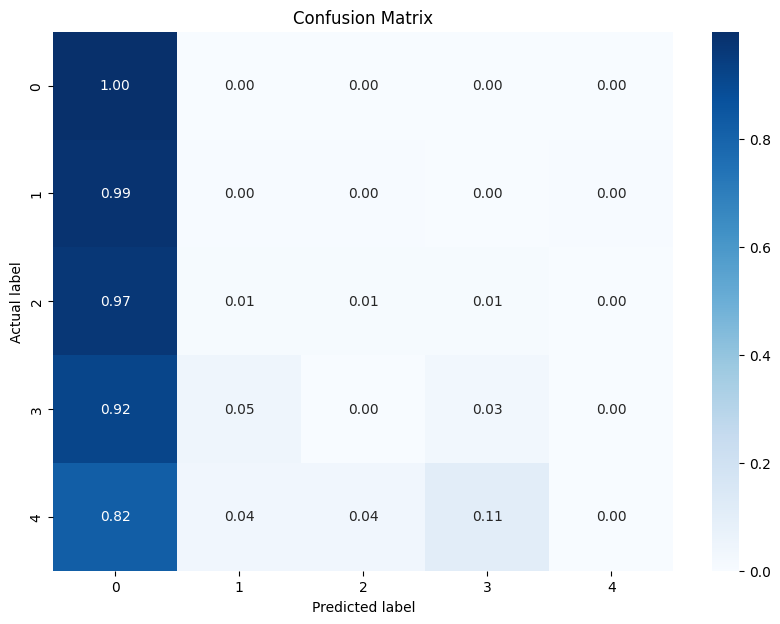

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 生成混淆矩陣
cm = confusion_matrix(y_test, y_pred)


# 轉換為比例
cm_ratio = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

# 使用Seaborn畫出混淆矩陣的熱力圖
plt.figure(figsize=(10, 7))
sns.heatmap(cm_ratio, annot=True, fmt=".2f", cmap="Blues")  # fmt='.2f' 指定顯示兩位小數
plt.title("Confusion Matrix")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.show()

## voting

In [11]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 假設 models 是你之前加載的模型列表
estimators = [(f"model_{i}", model) for i, model in enumerate(models)]

# 建立一個硬投票分類器
voting_clf = VotingClassifier(estimators=estimators, voting="hard")

# 訓練 voting_clf
voting_clf.fit(X_train, y_train)

# 進行預測，假設有一個測試資料集 X_test
y_pred = voting_clf.predict(X_test)

# 計算準確率，假設你有測試數據的真實標籤 y_test
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# 使用交叉驗證來評估模型
scores = cross_val_score(voting_clf, X, y, cv=5)  # cv 是交叉驗證的摺數
print(f"Cross-validation scores: {scores}")
print(f"voting Average score: {scores.mean()}")

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7104430379746836


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocess

Cross-validation scores: [0.67022539 0.67577197 0.64726841 0.39904988 0.62351544]
voting Average score: 0.6031662172480932


## stacking

In [12]:
from sklearn.ensemble import StackingClassifier  # 導入堆疊分類器(StackingClassifier)
from sklearn.linear_model import LogisticRegression  # 用於最終分類器


# 假設 models 是你之前加載的模型列表，其中每個模型都作為一個基學習器(base learner)
estimators = [(f"model_{i}", model) for i, model in enumerate(models)]

# 建立一個堆疊分類器
stacking_clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

# X_train, y_train 是您的訓練數據及其標籤
stacking_clf.fit(X_train, y_train)

# 計算訓練集上的準確率
accuracy = stacking_clf.score(X_train, y_train)
print("Training accuracy:", accuracy)

from sklearn.model_selection import cross_val_score

# 進行5折交叉驗證
scores = cross_val_score(stacking_clf, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("stacking Average score:", scores.mean())

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# 分割數據為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 重新訓練模型
stacking_clf.fit(X_train, y_train)

# 進行預測
y_pred = stacking_clf.predict(X_test)

# 生成混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)

# 計算百分比
conf_matrix_percent = (
    conf_matrix.astype("float") / conf_matrix.sum(axis=1)[:, np.newaxis]
)

# 使用Seaborn畫出以百分比顯示的混淆矩陣
# plt.figure(figsize=(10, 7))  # 設定圖片大小
# sns.heatmap(conf_matrix_percent, annot=True, fmt=".2%", cmap="Blues")
# plt.xlabel("Predicted label")
# plt.ylabel("True label")
# plt.title("Confusion Matrix (Percentage)")
# plt.show()

"""輸出模型"""
from joblib import dump, load

# 保存模型
dump(stacking_clf, "stacking_not_adaboost.joblib")

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_

Training accuracy: 0.7234475738038684


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_

Cross-validation scores: [0.65084746 0.69152542 0.67741935 0.67741935 0.66383701]
stacking Average score: 0.6722097205835803


c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_

['stacking_not_adaboost.joblib']

## boosting

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# 初始化梯度提升機模型
# 可以透過調整n_estimators、learning_rate和max_depth等參數進行優化
# 請根據您的數據和需求進行調整
gb_model = GradientBoostingClassifier(
    n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
)

# 將已經訓練好的模型作為初始估計器傳遞給GradientBoostingClassifier
gb_model.estimators_ = models

# 訓練模型
gb_model.fit(X_train, y_train)

# 預測測試集
y_pred = gb_model.predict(X_test)

# 評估模型性能
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

c:\Users\student\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.6903914590747331
